<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">


# Clustering Lab
_Author: Jeff Hale_

In this lab you will practice clustering countries with K-means and DBSCAN. Remember, clustering is an unsupervised learning method so known classes aren't something you'll generally have. 

#### Imports

In [29]:
import plotly.express as px
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score


#### Read in the gapminder data

In [2]:
gapminder = px.data.gapminder() 

#### Inspect

In [3]:
gapminder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
 6   iso_alpha  1704 non-null   object 
 7   iso_num    1704 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 106.6+ KB


In [4]:
gapminder.isna().sum()

country      0
continent    0
year         0
lifeExp      0
pop          0
gdpPercap    0
iso_alpha    0
iso_num      0
dtype: int64

In [5]:
gapminder.head(2)

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4


#### Filter the data so that you only have the rows from the most recent year

In [6]:
gapminder['year'].value_counts()

1952    142
1957    142
1962    142
1967    142
1972    142
1977    142
1982    142
1987    142
1992    142
1997    142
2002    142
2007    142
Name: year, dtype: int64

In [7]:
data = gapminder[gapminder['year'] == 2007]

#### Set the country column as the index

In [8]:
data.set_index('country', inplace=True)

#### Drop the columns that make sense to drop for clustering

In [9]:
# ... .drop(columns=['year', 'iso_alpha', 'iso_num'])
data = data.drop(columns=['year', 'iso_alpha', 'iso_num'])

#### One-Hot Encode the columns that it makes sense to encode

In [10]:
data.head()

,continent,lifeExp,pop,gdpPercap
country,,,,
Afghanistan,Asia,43.828,31889923,974.580338
Albania,Europe,76.423,3600523,5937.029526
Algeria,Africa,72.301,33333216,6223.367465
Angola,Africa,42.731,12420476,4797.231267
Argentina,Americas,75.320,40301927,12779.379640


In [11]:
data['continent'].value_counts()

Africa      52
Asia        33
Europe      30
Americas    25
Oceania      2
Name: continent, dtype: int64

In [12]:
# data = pd.get_dummies(data)
data['continent'] = data['continent'].map(
    {
        'Africa': 0,
        'Asia': 1,
        'Europe': 2,
        'Americas': 3,
        'Oceania': 4
    }
)

In [13]:
data.head(2)

,continent,lifeExp,pop,gdpPercap
country,,,,
Afghanistan,1,43.828,31889923,974.580338
Albania,2,76.423,3600523,5937.029526


#### Scale your features

In [14]:
data_scaled = StandardScaler().fit_transform(data)

In [15]:
data_scaled[0]

array([-0.20598874, -1.92673191, -0.08246934, -0.8354152 ])

#### Cluster with KMeans

In [16]:
kmeans = KMeans()
kmeans.fit(data_scaled)

KMeans()

#### How many clusters do you have?

In [17]:
kmeans.n_clusters

8

#### Check out the labels

In [18]:
kmeans.labels_

array([3, 2, 7, 3, 6, 0, 0, 5, 7, 0, 1, 6, 2, 3, 6, 2, 3, 3, 1, 3, 0, 3,
       3, 6, 4, 6, 1, 3, 1, 6, 3, 2, 6, 5, 0, 1, 6, 6, 7, 6, 3, 1, 3, 0,
       5, 1, 1, 0, 1, 5, 6, 1, 3, 6, 6, 0, 2, 0, 4, 7, 7, 1, 0, 5, 5, 6,
       5, 7, 1, 7, 5, 0, 7, 3, 3, 7, 1, 3, 7, 1, 1, 7, 6, 7, 2, 7, 3, 1,
       3, 1, 0, 6, 6, 1, 3, 0, 5, 7, 6, 6, 6, 7, 2, 5, 6, 7, 2, 3, 1, 5,
       1, 2, 3, 0, 2, 5, 3, 3, 5, 7, 1, 3, 0, 0, 7, 5, 3, 7, 1, 6, 7, 2,
       3, 0, 0, 6, 6, 7, 7, 1, 3, 3], dtype=int32)

#### Make a copy of the X DataFrame and add your labels to it

In [19]:
data_copy = data
data_copy['cluster'] = kmeans.labels_

In [20]:
data_copy.head(2)

,continent,lifeExp,pop,gdpPercap,cluster
country,,,,,
Afghanistan,1,43.828,31889923,974.580338,3
Albania,2,76.423,3600523,5937.029526,2


#### Explore your clusters with groupbys, pairplots/scatterplots

''

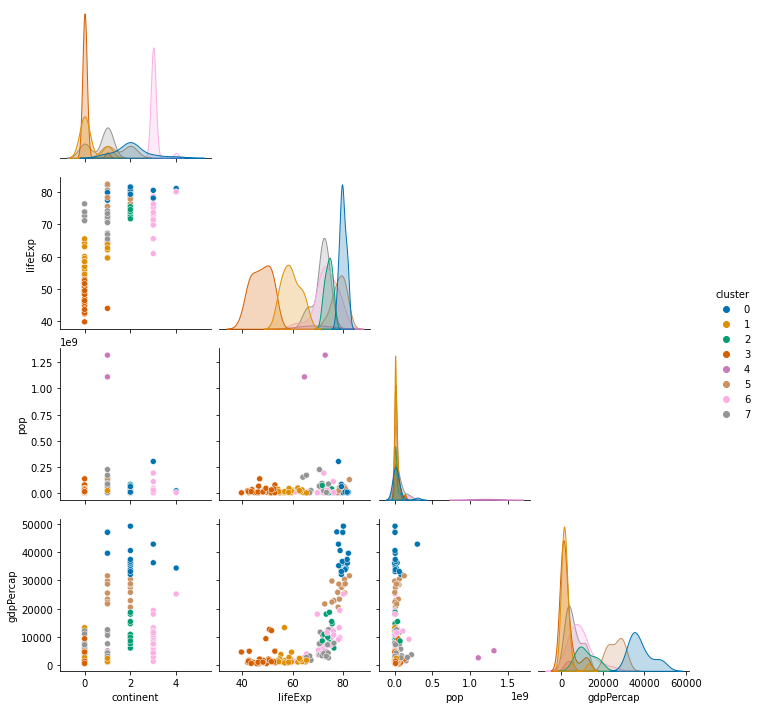

In [21]:
sns.pairplot(data_copy, corner=True, palette='colorblind', hue='cluster')
;

In [22]:
data_copy.groupby(by='continent').mean()

,lifeExp,pop,gdpPercap,cluster
continent,,,,
0,54.806038,1.787576e+07,3089.032605,2.846154
1,70.728485,1.155138e+08,12473.026870,4.727273
2,77.648600,1.953662e+07,25054.481636,1.900000
3,73.608120,3.595485e+07,11003.031625,5.520000
4,80.719500,1.227497e+07,29810.188275,3.000000


In [23]:
data_copy.groupby(by='cluster').mean()

,continent,lifeExp,pop,gdpPercap
cluster,,,,
0,2.055556,79.934944,3.242635e+07,38107.650928
1,0.217391,59.334000,1.469132e+07,2099.304817
2,2.000000,74.217273,1.619640e+07,11733.428196
3,0.035714,47.319964,2.136855e+07,2514.963414
4,1.000000,68.829500,1.214540e+09,3705.662630
5,1.500000,78.468571,3.077823e+07,26251.661481
6,3.041667,73.396333,2.368570e+07,9207.912985
7,0.681818,71.475591,5.111487e+07,5860.785797


#### Evaluate on silhouette score

In [24]:
silhouette_score(data_scaled, kmeans.labels_)

0.3446906714149239

#### What's the best number of clusters according to the silhouette score?

Try several numbers of clusters.

In [25]:
# With help from lesson 8.02 function
def find_best_silhouette(df): 
    """select best eps and min_samples for a DBSCAN
    Args:
        df (pandas DataFrame): data to cluster
    Returns:
        None
    """
    X_scaled = StandardScaler().fit_transform(df)
    best_score = -1
    best_clusters = 0
    for cluster in range(2, int(df.shape[0]/2)):
        kmeans = KMeans(n_clusters=cluster, random_state=1331)
        kmeans.fit(X_scaled)
        if len(np.unique(kmeans.labels_)) > 1:
            sil_score = silhouette_score(X_scaled, kmeans.labels_)
            if sil_score >= best_score:
                best_score = sil_score
                best_clusters = cluster
            print(f"Current Silhoutte Score: {sil_score}, [{cluster}]")
    print(f"Best Silhouette Score: {best_score}")
    print(f'Clusters: {best_clusters}')

In [26]:
find_best_silhouette(data)

Current Silhoutte Score: 0.4169075918290487, [2]
Current Silhoutte Score: 0.47788604047501165, [3]
Current Silhoutte Score: 0.5136642753541426, [4]
Current Silhoutte Score: 0.514227728615942, [5]
Current Silhoutte Score: 0.5328212825976354, [6]
Current Silhoutte Score: 0.5379615806288872, [7]
Current Silhoutte Score: 0.580463401692754, [8]
Current Silhoutte Score: 0.5629286148349857, [9]
Current Silhoutte Score: 0.5534584853597022, [10]
Current Silhoutte Score: 0.4951660055764319, [11]
Current Silhoutte Score: 0.522344549367337, [12]
Current Silhoutte Score: 0.49427618231395265, [13]
Current Silhoutte Score: 0.49716035161564204, [14]
Current Silhoutte Score: 0.4703948817785165, [15]
Current Silhoutte Score: 0.4870412611958837, [16]
Current Silhoutte Score: 0.4769731881403658, [17]
Current Silhoutte Score: 0.4820991088344077, [18]
Current Silhoutte Score: 0.45876193862873654, [19]
Current Silhoutte Score: 0.47040467868453506, [20]
Current Silhoutte Score: 0.4538067821785609, [21]
Curren

#### Make an elbow plot of the silhouette score

In [27]:
# With help from lesson 8.01
sil_list = []

for k in range(2, 51):
    kmeans = KMeans(n_clusters=k, random_state=1331)
    kmeans.fit(data_scaled)
    sil_list.append(silhouette_score(data_scaled, kmeans.labels_))

''

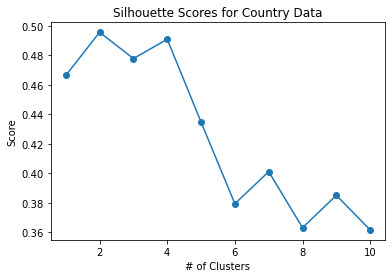

In [30]:
plt.plot(range(1, 11), sil_list[:10], marker='o')
plt.xlabel('# of Clusters')
plt.ylabel('Score')
plt.title('Silhouette Scores for Country Data')
;

## Part 2: DBSCAN

Use DBSCAN to cluster

In [31]:
dbscan = DBSCAN()
dbscan.fit(data_scaled)

DBSCAN()

In [32]:
dbscan.labels_

array([-1,  0,  1,  2,  3, -1,  0, -1, -1,  0,  2,  3,  0, -1, -1,  0,  2,
        2,  4,  2, -1,  2,  2,  3, -1,  3,  2,  2,  2,  3,  2,  0,  3,  0,
        0,  2,  3,  3,  1,  3, -1,  2,  2,  0,  0, -1,  2,  0,  2,  0,  3,
        2,  2, -1,  3, -1,  0,  0, -1, -1,  4,  4,  0, -1,  0,  3, -1,  4,
        2,  4, -1, -1,  4,  2,  2,  1,  2,  2,  4,  2,  2,  1,  3,  4,  0,
        1,  2,  4,  2,  4,  0, -1,  3,  2,  2, -1, -1, -1,  3,  3,  3,  4,
        0,  0,  3,  1,  0,  2,  2, -1,  2,  0,  2, -1,  0,  0,  2, -1,  0,
        4,  2,  2,  0,  0,  4, -1,  2,  4,  2, -1,  1,  0,  2,  0, -1,  3,
        3,  4,  4,  4,  2,  2])

In [33]:
data_copy['cluster'] = dbscan.labels_

#### Explore and visualize your results

''

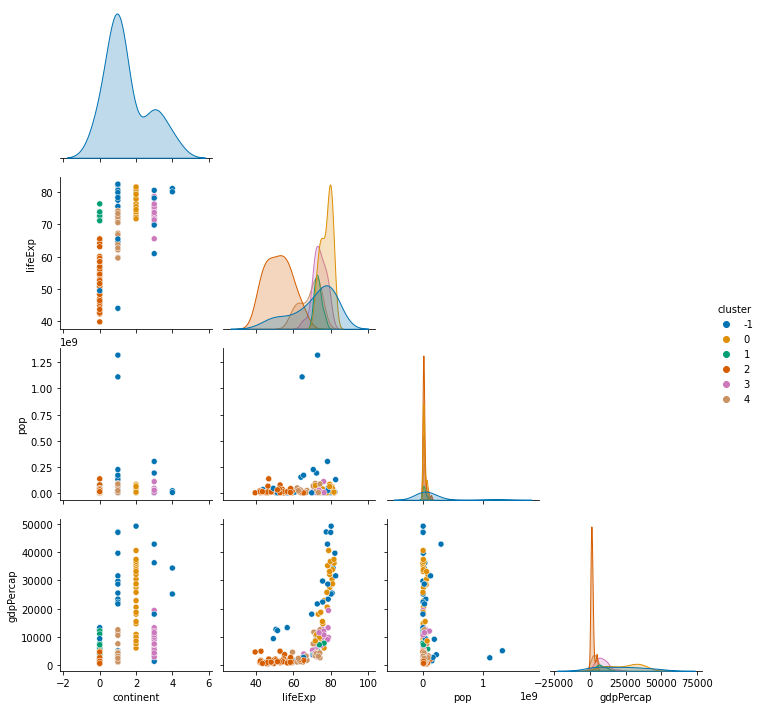

In [34]:
sns.pairplot(data_copy, corner=True, palette='colorblind', hue='cluster')
;

In [35]:
data_copy.groupby(by='continent').mean()

,lifeExp,pop,gdpPercap,cluster
continent,,,,
0,54.806038,1.787576e+07,3089.032605,1.634615
1,70.728485,1.155138e+08,12473.026870,1.575758
2,77.648600,1.953662e+07,25054.481636,-0.033333
3,73.608120,3.595485e+07,11003.031625,2.200000
4,80.719500,1.227497e+07,29810.188275,-1.000000


In [36]:
data_copy.groupby(by='cluster').mean()

,continent,lifeExp,pop,gdpPercap
cluster,,,,
-1,1.464286,70.639607,1.381008e+08,21315.579550
0,2.000000,77.560759,2.005071e+07,24216.457204
1,0.000000,73.131571,2.367385e+07,7628.894239
2,0.000000,51.941756,1.746780e+07,1464.081754
3,3.000000,73.909150,1.823855e+07,8376.447766
4,1.000000,68.715706,3.270890e+07,4617.537953


#### Hyperparameter tune 

In [38]:
# Using lesson 8.02 function
def find_best_silhouette_dbscan(df): 
    """select best eps and min_samples for a DBSCAN
    Args:
        df (pandas DataFrame): data to cluster
    Returns:
        None
    """
    X_scaled = StandardScaler().fit_transform(df)
    best_score = -1
    best_e = .2
    best_ms = .2
    best_clusters = 0
    for e in np.linspace(.2, 5, 50):
        for ms in range(2, int(df.shape[0])):
            dbscan = DBSCAN(eps=e, min_samples=ms, n_jobs=-1)
            dbscan.fit(X_scaled)
            if len(np.unique(dbscan.labels_)) > 1:
                sil_score = silhouette_score(X_scaled, dbscan.labels_)
                if sil_score >= best_score:
                    best_score = sil_score
                    best_e = e
                    best_ms = ms
                    best_clusters = np.unique(dbscan.labels_)
                print(f"Current Silhoutte Score: {sil_score}, [{e}, {ms}]")
    print(f"Best Silhouette Score: {best_score}")
    print(f"Best eps: {best_e}")
    print(f"Best min_samples: {best_ms}")
    print(f'Clusters: {best_clusters}')

In [39]:
find_best_silhouette_dbscan(data)

Current Silhoutte Score: 0.0761611713380564, [0.2, 2]
Current Silhoutte Score: -0.051210118450088805, [0.2, 3]
Current Silhoutte Score: -0.09454867728129669, [0.2, 4]
Current Silhoutte Score: -0.036155247369907, [0.2, 5]
Current Silhoutte Score: -0.04513116699138576, [0.2, 6]
Current Silhoutte Score: -0.1269953094502527, [0.2, 7]
Current Silhoutte Score: 0.3173876907228572, [0.2979591836734694, 2]
Current Silhoutte Score: 0.20840572232732701, [0.2979591836734694, 3]
Current Silhoutte Score: 0.17061853526206222, [0.2979591836734694, 4]
Current Silhoutte Score: 0.14840839918236776, [0.2979591836734694, 5]
Current Silhoutte Score: 0.1164373298927565, [0.2979591836734694, 6]
Current Silhoutte Score: 0.05160680232373832, [0.2979591836734694, 7]
Current Silhoutte Score: 0.05160680232373832, [0.2979591836734694, 8]
Current Silhoutte Score: 0.1337811550210734, [0.2979591836734694, 9]
Current Silhoutte Score: 0.1259562348374449, [0.2979591836734694, 10]
Current Silhoutte Score: 0.05520592754495

#### Which algorithm with which hyperparameters would you use to cluster a new country? Why?

- Best Silhouette Score for KMeans was about 0.58 after 18 seconds of tuning.
- Best Silhouette Score for DBSCAN was about 0.69 after 75 seconds of tuning.

If compute time is not a factor, DBSCAN would be my choice given it's higher score.

## Bonus ⭐️

Use Agglomerative Clustering or another a clustering algorithm. Scikit-learn has a guide to its clustering algorithms [here](https://scikit-learn.org/stable/modules/clustering.html).